<a href="https://colab.research.google.com/github/sohelkhan973/Uber-Raw-Data/blob/master/Random_%26_UberDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pylab inline
import pandas as pd
import seaborn as sns
from google.colab import files
import io


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# **Load CSV file into memory**

In [0]:
uploaded = files.upload()

Saving uber-raw-data-apr14.csv to uber-raw-data-apr14 (1).csv


In [0]:
df = pd.read_csv(io.StringIO(uploaded['uber-raw-data-apr14.csv'].decode('utf-8')))

In [0]:
print(df)

                 Date/Time      Lat      Lon    Base
0         4/1/2014 0:11:00  40.7690 -73.9549  B02512
1         4/1/2014 0:17:00  40.7267 -74.0345  B02512
2         4/1/2014 0:21:00  40.7316 -73.9873  B02512
3         4/1/2014 0:28:00  40.7588 -73.9776  B02512
4         4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]


In [0]:
df['Date/Time'] = df['Date/Time'].map(pandas.to_datetime)

# **Convert datetime and add some useful columns**

In [0]:
print(df)

                 Date/Time      Lat      Lon    Base
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]


In [0]:
def get_dom(dt):
    return dt.day

df['dom'] = df['Date/Time'].map(get_dom)

def get_weekday(dt):
    return dt.weekday()

df['weekday'] = df['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

df['hour'] = df['Date/Time'].map(get_hour)


In [0]:
print(df)

                 Date/Time      Lat      Lon    Base  dom  weekday  hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
...                    ...      ...      ...     ...  ...      ...   ...
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764   30        2    23
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764   30        2    23
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764   30        2    23
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764   30        2    23
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764   30        2    23

[564516 rows x 7 columns]


# **Analysis**

# **Analysis dom**

In [0]:
import matplotlib
import altair as alt


In [0]:
hist(df.dom, bins=30, range=(0.5, 30.5), normed=None, weights=None, density=.8)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')

AttributeError: ignored

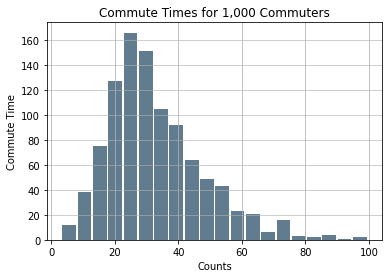

In [0]:
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [0]:
# Sample from two different normal distributions
means = 10, 20
stdevs = 4, 2
dist = pd.DataFrame(
np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
columns=['a', 'b'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

,a,b
min,-0.87,14.00
max,22.54,26.18
mean,10.16,20.10
std,4.02,1.93


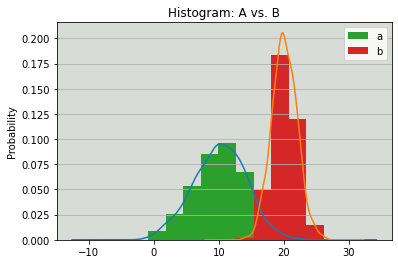

In [0]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')